In [276]:
import chess
import chess.engine
import os
import io
import chess.pgn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [277]:
from stockfish import Stockfish

stockfish = Stockfish(path=r"C:\Users\diman\Downloads\stockfish-windows-x86-64-avx2\stockfish\stockfish-windows-x86-64-avx2.exe")


In [278]:
stockfish.set_depth(8)

In [279]:
pgn1 = 'd4 d5 Nc3 Nf6 Bf4 g6 f3 Bg7 Qd3 Bf5 e4 dxe4 fxe4 Bc8 h3 O-O g4 Nc6 O-O-O e6 e5 Nd5 Nxd5 Qxd5 Qf3 Qa5 a3 Rb8 h4 Qb6 d5 exd5 Qxd5 Bxg4 Be2 Be6 Qd2 Rbd8 Qe1 Rxd1+ Qxd1 Nd4 Bd3 Qc5 h5 Qd5 Ne2 Nxe2+ Bxe2 Qa2 Kd2 Qxb2 hxg6 fxg6 Bg3 Rd8+ Bd3 Bc4 Ke1 Bxd3 cxd3 Bxe5 Bxe5 Qxe5+ Kd2 Qb2+ Ke3 Qxa3 Qc2 Re8+ Kf4 Qd6+ Kg5 Qe5+ Kh6 Qf4# 0-1'


In [ ]:
pgn_io = io.StringIO("[Event \"?\"]\n[Site \"?\"]\n[Date \"????.??.??\"]\n[Round \"?\"]\n[White \"?\"]\n[Black \"?\"]\n\n" + pgn1)
#pgn_io = data_blitz.iloc[221]["pgn"]

game = chess.pgn.read_game(pgn_io)

board = game.board()

eval_array1 = []

move_number = 1
for move in game.mainline_moves():
    board.push(move) 
    stockfish.set_fen_position(board.fen())
    
    eval_info = stockfish.get_evaluation()
    
    if eval_info["type"] == "cp":
        eval_score = eval_info["value"] / 100  # converts centipawns eval measurement to pawns for readability
    elif eval_info["type"] == "mate":
        eval_score = f"mate in {eval_info['value']}"
    else:
        eval_score = None
    
    eval_array1.append(eval_score)
    move_number += 1

print(eval_array1)

[0.13, 0.25, 0.01, -0.05, -0.08, 0.19, -0.5, -0.25, -1.41, 0.93, 0.77, 1.16, 0.52, 0.96, -0.15, 0.99, 0.4, 1.13, 0.81, 2.19, 0.16, -0.25, -0.63, -0.48, -1.12, 1.07, 0.5, 1.09, 0.43, 2.87, -3.05, 0.33, -3.37, -3.85, -4.46, -3.74, -4.47, -3.34, -4.64, -3.38, -5.17, -2.81, -3.56, -3.23, -3.54, -3.0, -3.12, -2.84, -3.13, -3.48, -3.82, -3.99, -6.4, -4.98, -5.31, -5.18, -5.11, -5.13, -5.16, -4.53, -5.44, -5.4, -5.35, -5.06, -5.95, -5.86, -5.99, -5.01, -4.99, -5.05, -6.29, -5.52, 'mate in -2', -5.18, 'mate in -1', 'mate in 0']


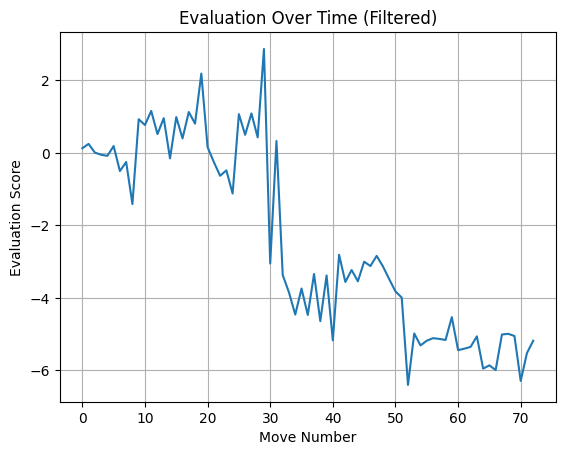

In [281]:
numeric_data = []
for item in eval_array1:
    if isinstance(item, (int, float)):
        numeric_data.append(item)

plt.plot(numeric_data)
plt.title('Evaluation Over Time (Filtered)')
plt.xlabel('Move Number')
plt.ylabel('Evaluation Score')
plt.grid(True)
plt.show()

In [282]:
import statistics
var = statistics.variance(numeric_data)
print("Variance:", var)

Variance: 6.846361719939117


In [283]:
blunders_white = 0
mistakes_white = 0
normal_white = 0

blunders_black = 0
mistakes_black = 0
normal_black = 0

total_change_black = 0
total_change_white = 0

gradient = 0

i = 1
j=0
while i<len(eval_array1):
    if i % 2 ==0:
        if type(eval_array1[i])==str:
            eval_array1[i]=8
        if abs(eval_array1[i]-eval_array1[j]) >=1.5:
            blunders_white += 1
        elif 0.5 < abs(eval_array1[i]-eval_array1[j]) <1.5:
            mistakes_white +=1
        else:
            normal_white += 1
    else:
        if type(eval_array1[i])==str:
            eval_array1[i]=-8
        if abs(eval_array1[i]-eval_array1[j]) >=1.5:
            blunders_black += 1
        elif 0.5 < abs(eval_array1[i]-eval_array1[j]) <1.5:
            mistakes_black +=1
        else:
            normal_black += 1 

    j+=1
    i +=1

In [284]:
print(eval_array1)

[0.13, 0.25, 0.01, -0.05, -0.08, 0.19, -0.5, -0.25, -1.41, 0.93, 0.77, 1.16, 0.52, 0.96, -0.15, 0.99, 0.4, 1.13, 0.81, 2.19, 0.16, -0.25, -0.63, -0.48, -1.12, 1.07, 0.5, 1.09, 0.43, 2.87, -3.05, 0.33, -3.37, -3.85, -4.46, -3.74, -4.47, -3.34, -4.64, -3.38, -5.17, -2.81, -3.56, -3.23, -3.54, -3.0, -3.12, -2.84, -3.13, -3.48, -3.82, -3.99, -6.4, -4.98, -5.31, -5.18, -5.11, -5.13, -5.16, -4.53, -5.44, -5.4, -5.35, -5.06, -5.95, -5.86, -5.99, -5.01, -4.99, -5.05, -6.29, -5.52, 8, -5.18, 8, -8]


In [285]:
print(blunders_white)

7


In [286]:
x = np.arange(len(eval_array1)).reshape(-1, 1)
y = np.array(eval_array1).reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
gradient = model.coef_[0][0]
b = model.intercept_[0]

In [287]:
print(gradient)

-0.08081544771018455


In [288]:
processed_data_blitz = pd.read_csv(r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Processed.csv")

In [289]:
processed_data_blitz.head

<bound method NDFrame.head of        white_rating  black_rating white_result black_result time_control  \
0              1547          1399      timeout          win          300   
1              1514          1536          win     resigned          300   
2              1544          1452          win   checkmated          300   
3               857           821          win      timeout          300   
4               829           817          win   checkmated          300   
...             ...           ...          ...          ...          ...   
28800           866           901     resigned          win          300   
28801           910           912          win      timeout          300   
28802           909           919    abandoned          win          300   
28803           928           933          win     resigned          300   
28804           927           919          win     resigned          300   

       rated                                             

In [290]:
processed_data_blitz.drop(columns=["pgn"])

,white_rating,black_rating,white_result,black_result,time_control,rated,Moves,Time_Difference
0,1547,1399,timeout,win,300,True,e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0
1,1514,1536,win,resigned,300,True,e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0
2,1544,1452,win,checkmated,300,True,e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0
3,857,821,win,timeout,300,True,e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0
4,829,817,win,checkmated,300,True,e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0
...,...,...,...,...,...,...,...,...
28800,866,901,resigned,win,300,True,e4 e6 d4 d5 e5 f5 Nf3 Nc6 c3 Bd7 Qb3 b6 a4 Qe7...,143.0
28801,910,912,win,timeout,300,True,e4 e5 c4 Nc6 d3 Nf6 g3 d6 Nh3 Bg4 Be2 Bxe2 Qxe...,562.0
28802,909,919,abandoned,win,300,True,e4 e5 Nf3 d6 Bc4 c5 Ng5 Qxg5 O-O Bh3 Qf3 Bg4 Q...,407.0
28803,928,933,win,resigned,300,True,e4 c5 d3 Nc6 c4 e5 Nc3 Nf6 g3 d6 Nh3 Be6 Bg2 h...,84.0


In [ ]:
def get_eval(pgn):
    pgn_io = io.StringIO("[Event \"?\"]\n[Site \"?\"]\n[Date \"????.??.??\"]\n[Round \"?\"]\n[White \"?\"]\n[Black \"?\"]\n\n" + pgn)
    #pgn_io = data_blitz.iloc[221]["pgn"]

    game = chess.pgn.read_game(pgn_io)


    board = game.board()

    # Store move number and eval
    eval_array = []

    move_number = 1
    for move in game.mainline_moves():
        board.push(move) 
        stockfish.set_fen_position(board.fen())
        
        eval_info = stockfish.get_evaluation()
        

        if eval_info["type"] == "cp":
            eval_score = eval_info["value"] / 100  
        elif eval_info["type"] == "mate":

            eval_score = f"mate in {eval_info['value']}"
        else:
            eval_score = None
        
        eval_array.append(eval_score)
        move_number += 1

    return eval_array

In [292]:
def get_data(eval_array):
    blunders_white = 0
    mistakes_white = 0
    normal_white = 0

    blunders_black = 0
    mistakes_black = 0
    normal_black = 0

    total_change_black = 0
    total_change_white = 0

    gradient = 0

    total = 0
    i = 1
    j=0
    while i<len(eval_array):

        if i % 2 ==0:
            if type(eval_array[i])==str:
                eval_array[i]=8
            if abs(eval_array[i]-eval_array[j]) >=1.5:
                blunders_white += 1
            elif 0.5 < abs(eval_array[i]-eval_array[j]) <1.5:
                mistakes_white +=1
            else:
                normal_white += 1
            total_change_white += eval_array[i]-eval_array[j]
            total+=eval_array[i]
        else:
            if type(eval_array[i])==str:
                eval_array[i]=-8
            if abs(eval_array[i]-eval_array[j]) >=1.5:
                blunders_black += 1
            elif 0.5 < abs(eval_array[i]-eval_array[j]) <1.5:
                mistakes_black +=1
            else:
                normal_black += 1
            total_change_black += eval_array[i]-eval_array[j]
            total+=eval_array[i]
        j+=1
        i +=1
    x = np.arange(len(eval_array)).reshape(-1, 1)
    y = np.array(eval_array).reshape(-1, 1)


    if len(eval_array)>1:
        variance = statistics.variance(eval_array)

        model = LinearRegression()
        model.fit(x, y)
        gradient = model.coef_[0][0]
        b = model.intercept_[0]

    else:
        variance = 0
        gradient =0
    if i !=0:
        average_eval = total/i
        average_eval_change_black = total_change_black/i
        average_eval_change_white = total_change_white/i
    else:
        average_eval = 0
        average_eval_change_black = 0
        average_eval_change_white = 0
        
    game_length = i

    return {
        "blunders_white": blunders_white,
        "mistakes_white": mistakes_white,
        "normal_white": normal_white,
        "blunders_black": blunders_black,
        "mistakes_black": mistakes_black,
        "normal_black": normal_black,
        "gradient": gradient,
        "variance": variance,
        "average_eval": average_eval,
        "average_eval_change_black": average_eval_change_black,
        "average_eval_change_white": average_eval_change_white,
        "game_length": game_length

    }

In [293]:
data_after_collection = processed_data_blitz[['blunders_white', 'mistakes_white', 'normal_white', 'blunders_black', 'mistakes_black', 'normal_black', 'gradient',"variance", "average_eval", "average_eval_change_black", "average_eval_change_white", "game_length"]] = None

In [294]:
row = 0
while row<5:
    pgn = processed_data_blitz.iloc[row]["Moves"]
    eval_array = get_eval(pgn)
    stats = get_data(eval_array)
    processed_data_blitz.at[row, "blunders_white"] = stats["blunders_white"]
    processed_data_blitz.at[row, "mistakes_white"] = stats["mistakes_white"]
    processed_data_blitz.at[row, "normal_white"] = stats["normal_white"]
    processed_data_blitz.at[row, "blunders_black"] = stats["blunders_black"]
    processed_data_blitz.at[row, "mistakes_black"] = stats["mistakes_black"]
    processed_data_blitz.at[row, "normal_black"] = stats["normal_black"]
    processed_data_blitz.at[row, "gradient"] = stats["gradient"]
    processed_data_blitz.at[row, "variance"] = stats["variance"]
    processed_data_blitz.at[row, "average_eval"] = stats["average_eval"]
    processed_data_blitz.at[row, "average_eval_change_black"] = stats["average_eval_change_black"]
    processed_data_blitz.at[row, "average_eval_change_white"] = stats["average_eval_change_white"]
    processed_data_blitz.at[row, "game_length"] = stats["game_length"]
    
    row +=1

In [295]:
processed_data_blitz.head

<bound method NDFrame.head of        white_rating  black_rating white_result black_result time_control  \
0              1547          1399      timeout          win          300   
1              1514          1536          win     resigned          300   
2              1544          1452          win   checkmated          300   
3               857           821          win      timeout          300   
4               829           817          win   checkmated          300   
...             ...           ...          ...          ...          ...   
28800           866           901     resigned          win          300   
28801           910           912          win      timeout          300   
28802           909           919    abandoned          win          300   
28803           928           933          win     resigned          300   
28804           927           919          win     resigned          300   

       rated                                             

In [296]:
processed_data_blitz = pd.DataFrame(processed_data_blitz)

In [1]:
processed_data_blitz.head(20)

NameError: name 'processed_data_blitz' is not defined

In [298]:
row = 0
while row<14000:
    pgn = processed_data_blitz.iloc[row]["Moves"]
    eval_array = get_eval(pgn)
    stats = get_data(eval_array)
    processed_data_blitz.at[row, "blunders_white"] = stats["blunders_white"]
    processed_data_blitz.at[row, "mistakes_white"] = stats["mistakes_white"]
    processed_data_blitz.at[row, "normal_white"] = stats["normal_white"]
    processed_data_blitz.at[row, "blunders_black"] = stats["blunders_black"]
    processed_data_blitz.at[row, "mistakes_black"] = stats["mistakes_black"]
    processed_data_blitz.at[row, "normal_black"] = stats["normal_black"]
    processed_data_blitz.at[row, "gradient"] = stats["gradient"]
    processed_data_blitz.at[row, "variance"] = stats["variance"]
    processed_data_blitz.at[row, "average_eval"] = stats["average_eval"]
    processed_data_blitz.at[row, "average_eval_change_black"] = stats["average_eval_change_black"]
    processed_data_blitz.at[row, "average_eval_change_white"] = stats["average_eval_change_white"]
    processed_data_blitz.at[row, "game_length"] = stats["game_length"]
    
    row +=1

ambiguous san: 'Rf1' in r1b2r1k/2p3p1/p6p/1pPQ4/7P/P3P1P1/1P2Bq2/2KR3R w - - 1 20 while parsing <Game at 0x15f1f1b48b0 ('?' vs. '?', '????.??.??' at '?')>
ambiguous san: 'Re1' in r4rk1/pppb1ppp/1bn5/5P2/1P4P1/P2PpN1P/1BP3B1/2KR3R w - - 0 20 while parsing <Game at 0x15f1f3198d0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'Bb7' in rnbqkbnr/pppppppp/8/8/8/3P4/PPP1PPPP/RNBQKBNR b KQkq - 0 1 while parsing <Game at 0x15f0fb12a40 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'e5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f193b43a0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'e5' in rnbqkbnr/pppp1ppp/4p3/8/8/2N5/PPPPPPPP/R1BQKBNR w KQkq - 0 2 while parsing <Game at 0x15f194649d0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'exd5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f0fb83040 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'Bf4' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq 

In [299]:
import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "my_data21.csv")
processed_data_blitz.to_csv(downloads_path, index=False)

In [301]:
row = 14000
while row<28805:
    pgn = processed_data_blitz.iloc[row]["Moves"]
    eval_array = get_eval(pgn)
    stats = get_data(eval_array)
    processed_data_blitz.at[row, "blunders_white"] = stats["blunders_white"]
    processed_data_blitz.at[row, "mistakes_white"] = stats["mistakes_white"]
    processed_data_blitz.at[row, "normal_white"] = stats["normal_white"]
    processed_data_blitz.at[row, "blunders_black"] = stats["blunders_black"]
    processed_data_blitz.at[row, "mistakes_black"] = stats["mistakes_black"]
    processed_data_blitz.at[row, "normal_black"] = stats["normal_black"]
    processed_data_blitz.at[row, "gradient"] = stats["gradient"]
    processed_data_blitz.at[row, "variance"] = stats["variance"]
    processed_data_blitz.at[row, "average_eval"] = stats["average_eval"]
    processed_data_blitz.at[row, "average_eval_change_black"] = stats["average_eval_change_black"]
    processed_data_blitz.at[row, "average_eval_change_white"] = stats["average_eval_change_white"]
    processed_data_blitz.at[row, "game_length"] = stats["game_length"]
    
    row +=1

illegal san: 'exd5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f1f1b23b0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'Bb2' in r2qkb1r/1ppb1ppp/p1n1pn2/3p4/P7/4PN2/1PPPBPPP/RNBQ1RK1 w kq - 1 7 while parsing <Game at 0x15f1966c1f0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'e5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f1960dd50 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'exd5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f1f2c1c60 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'exd5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f19377be0 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'e5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 while parsing <Game at 0x15f1f549090 ('?' vs. '?', '????.??.??' at '?')>
illegal san: 'exd5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 

In [302]:
import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "my_data22.csv")
processed_data_blitz.to_csv(downloads_path, index=False)